In [1]:
%tensorflow_version 2.x
from tensorflow import keras
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model

TensorFlow 2.x selected.


In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print('Train Images: {}'.format(train_images.shape))
print('Train Labels: {}'.format(train_labels.shape))
print('Test Images: {}'.format(test_images.shape))
print('Test Labels: {}'.format(test_labels.shape))

Train Images: (60000, 28, 28)
Train Labels: (60000,)
Test Images: (10000, 28, 28)
Test Labels: (10000,)


In [0]:
train_images = train_images.reshape(train_images.shape[0],train_images.shape[1],train_images.shape[2], 1)
test_images = test_images.reshape(test_images.shape[0],test_images.shape[1],test_images.shape[2], 1)

train_images  = train_images / 255.0
test_images = test_images / 255.0

val_images = test_images[:5000]
val_labels = test_labels[:5000]

test_images = test_images[5000:]
test_labels = test_labels[5000:]

In [0]:
l = keras.layers
model = keras.Sequential([
                          l.Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
                          l.MaxPool2D(pool_size=(2,2), padding = 'same'),
                          l.Conv2D(32, (3,3), padding='same', activation='relu', kernel_initializer='he_uniform'),
                          l.MaxPool2D(pool_size=(2,2), padding = 'same'),
                          l.Flatten(),
                          l.Dense(1000, activation='relu', kernel_initializer='he_uniform'),
                          l.Dropout(0.5),
                          l.Dense(500, activation='relu', kernel_initializer='he_uniform'),
                          l.Dropout(0.5),
                          l.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [0]:
callback = keras.callbacks.ModelCheckpoint('Model.h5', verbose=1, save_best_only=True)

In [8]:
model.fit(train_images, train_labels, epochs=30, verbose=1, callbacks=[callback], validation_data=(val_images, val_labels))

Train on 60000 samples, validate on 5000 samples
Epoch 1/30
59520/60000 [============================>.] - ETA: 0s - loss: 0.1680 - acc: 0.9481
Epoch 00001: val_loss improved from inf to 0.08882, saving model to Model.h5
60000/60000 [==============================] - 14s 233us/sample - loss: 0.1676 - acc: 0.9482 - val_loss: 0.0888 - val_acc: 0.9708
Epoch 2/30
59520/60000 [============================>.] - ETA: 0s - loss: 0.0717 - acc: 0.9794
Epoch 00002: val_loss improved from 0.08882 to 0.07110, saving model to Model.h5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0720 - acc: 0.9793 - val_loss: 0.0711 - val_acc: 0.9762
Epoch 3/30
59904/60000 [============================>.] - ETA: 0s - loss: 0.0547 - acc: 0.9842
Epoch 00003: val_loss improved from 0.07110 to 0.05891, saving model to Model.h5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0547 - acc: 0.9842 - val_loss: 0.0589 - val_acc: 0.9822
Epoch 4/30
59840/60000 [===============

In [9]:
model.evaluate(test_images, test_labels)

5000/5000 [==============================] - 0s 74us/sample - loss: 0.0339 - acc: 0.9964


[0.033945151540033594, 0.9964]

In [0]:
model.save('CNN_Model_99.6%.h5')

In [0]:
json = model.to_json()
with open('CNN_Model_99.6%.json', 'w') as json_f:
  json_f.write(json)

yaml = model.to_yaml()
with open('CNN_Model_99.6%.yaml', 'w') as yaml_f:
  yaml_f.write(yaml)

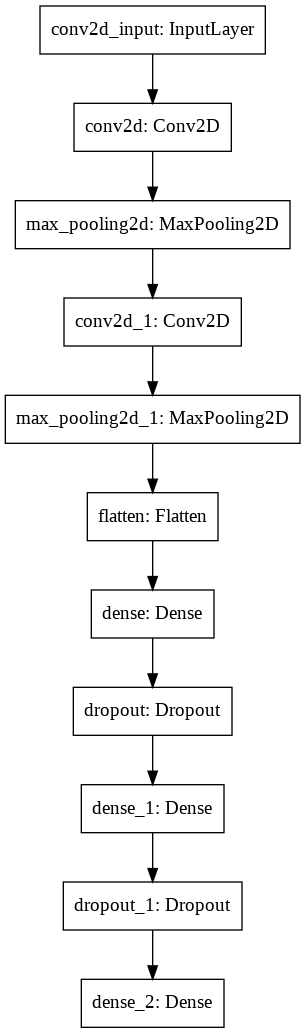

In [13]:
plot_model(model, 'CNN_Model_99.6%.png')